In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:
mydb = mysql.connector.connect(host = 'localhost',
                               user = 'root',
                               passwd = 'root',
                               database = 'northwind')

# Membuat function untuk meng-execute query dari SQL
mycursor = mydb.cursor()

def sql_df(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    df = pd.DataFrame(result, columns = mycursor.column_names)
    return df

def create_view(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    return result

def create_variable(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    return result

# GENERAL QUESTION

1. Ada berapa banyak tabel yang disediakan oleh database yang tersedia? Jika terdapat ERD, silahkan ditampilkan.

<img src='Northwind ERD.png' />

# SQL

1. Apakah tabel customers, orders, ordersdetail, dan products dapat digabungkan
menjadi 1 tabel? Jika memungkinkan, tampilkan tabel yang memuat informasi
transaksi yang melibatkan keempat tabel tersebut.

In [4]:
sql_df('''SELECT * FROM ORDERS O 
       JOIN CUSTOMERS C ON C.CustomerID = O.CustomerID
       JOIN ORDERDETAILS OD ON OD.OrderID = O.OrderId
       JOIN PRODUCTS P ON P.ProductID = OD.ProductID''')

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,10643,ALFKI,6,1997-08-25,1997-09-22,1997-09-02,1,29.4600,Alfreds Futterkiste,Obere Str. 57,...,28,Rssle Sauerkraut,12,7,25 - 825 g cans,45.6000,26,0,0,1
1,10643,ALFKI,6,1997-08-25,1997-09-22,1997-09-02,1,29.4600,Alfreds Futterkiste,Obere Str. 57,...,39,Chartreuse verte,18,1,750 cc per bottle,18.0000,69,0,5,0
2,10643,ALFKI,6,1997-08-25,1997-09-22,1997-09-02,1,29.4600,Alfreds Futterkiste,Obere Str. 57,...,46,Spegesild,21,8,4 - 450 g glasses,12.0000,95,0,0,0
3,10692,ALFKI,4,1997-10-03,1997-10-31,1997-10-13,2,61.0200,Alfred-s Futterkiste,Obere Str. 57,...,63,Vegie-spread,7,2,15 - 625 g jars,43.9000,24,0,5,0
4,10702,ALFKI,4,1997-10-13,1997-11-24,1997-10-21,1,23.9400,Alfred-s Futterkiste,Obere Str. 57,...,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0000,13,70,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,10998,WOLZA,8,1998-04-03,1998-04-17,1998-04-17,2,20.3100,Wolski Zajazd,ul. Filtrowa 68,...,24,Guaran Fantstica,10,1,12 - 355 ml cans,4.5000,20,0,0,1
2151,10998,WOLZA,8,1998-04-03,1998-04-17,1998-04-17,2,20.3100,Wolski Zajazd,ul. Filtrowa 68,...,61,Sirop d'rable,29,2,24 - 500 ml bottles,28.5000,113,0,25,0
2152,10998,WOLZA,8,1998-04-03,1998-04-17,1998-04-17,2,20.3100,Wolski Zajazd,ul. Filtrowa 68,...,74,Longlife Tofu,4,7,5 kg pkg.,10.0000,4,20,5,0
2153,10998,WOLZA,8,1998-04-03,1998-04-17,1998-04-17,2,20.3100,Wolski Zajazd,ul. Filtrowa 68,...,75,Rhnbru Klosterbier,12,1,24 - 0.5 l bottles,7.7500,125,0,25,0


2. 5 Nama produk yang paling banyak diorder

In [5]:
sql_df('''SELECT P.ProductName, OD.Quantity FROM ORDERS O 
       JOIN ORDERDETAILS OD ON OD.OrderID = O.OrderId
       JOIN PRODUCTS P ON P.ProductID = OD.ProductID
       GROUP BY P.ProductName
       ORDER BY Quantity Desc
       Limit 5''')

,ProductName,Quantity
0,Chocolade,70
1,Northwoods Cranberry Sauce,70
2,Chef Anton's Gumbo Mix,65
3,Nord-Ost Matjeshering,60
4,Boston Crab Meat,50


3. 5 Region customer yang paling banyak melakukan order dan yang paling sedikit melakukan order

In [6]:
sql_df('''SELECT C.Region, Quantity FROM ORDERS O 
       JOIN CUSTOMERS C ON C.CustomerID = O.CustomerID
       JOIN ORDERDETAILS OD ON OD.OrderID = O.OrderId
       GROUP BY C.Region
       ORDER BY Quantity DESC
       LIMIT 5''')

,Region,Quantity
0,Nueva Esparta,50
1,Qubec,40
2,Co. Cork,40
3,AK,25
4,Tchira,25


In [7]:
sql_df('''SELECT C.Region, Quantity FROM ORDERS O 
       JOIN CUSTOMERS C ON C.CustomerID = O.CustomerID
       JOIN ORDERDETAILS OD ON OD.OrderID = O.OrderId
       GROUP BY C.Region
       ORDER BY Quantity ASC
       LIMIT 5''')

,Region,Quantity
0,OR,3
1,RJ,10
2,CA,10
3,MT,10
4,DF,10


4. Nama perusahaan shipping yang paling banyak mengirimkan barang ke customer

In [8]:
sql_df('''SELECT S.CompanyName, SUM(OrderId) as Sum_order FROM SHIPPERS S 
        JOIN ORDERS O ON S.ShipperID = O.ShipVia
        GROUP BY S.CompanyName
        ORDER BY Sum_order DESC''')

,CompanyName,Sum_order
0,United Package,3480038
1,Federal Shipping,2713606
2,Speedy Express,2656231


# DATA MANIPULATION

1. Gabungkan table Orders dan table OrderDetails

In [9]:
df_o = sql_df('SELECT * FROM ORDERS')
df_do = sql_df('SELECT * FROM ORDERDETAILS')

In [10]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         830 non-null    int64         
 1   CustomerID      830 non-null    object        
 2   EmployeeID      830 non-null    int64         
 3   OrderDate       830 non-null    datetime64[ns]
 4   RequiredDate    830 non-null    datetime64[ns]
 5   ShippedDate     809 non-null    datetime64[ns]
 6   ShipVia         830 non-null    int64         
 7   Freight         830 non-null    object        
 8   ShipName        830 non-null    object        
 9   ShipAddress     830 non-null    object        
 10  ShipCity        830 non-null    object        
 11  ShipRegion      323 non-null    object        
 12  ShipPostalCode  811 non-null    object        
 13  ShipCountry     830 non-null    object        
dtypes: datetime64[ns](3), int64(3), object(8)
memory usage: 90

In [11]:
df_do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    2155 non-null   int64  
 1   ProductID  2155 non-null   int64  
 2   UnitPrice  2155 non-null   object 
 3   Quantity   2155 non-null   int64  
 4   Discount   2155 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 84.3+ KB


In [12]:
df = pd.merge(df_o, df_do, on='OrderID')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         2155 non-null   int64         
 1   CustomerID      2155 non-null   object        
 2   EmployeeID      2155 non-null   int64         
 3   OrderDate       2155 non-null   datetime64[ns]
 4   RequiredDate    2155 non-null   datetime64[ns]
 5   ShippedDate     2082 non-null   datetime64[ns]
 6   ShipVia         2155 non-null   int64         
 7   Freight         2155 non-null   object        
 8   ShipName        2155 non-null   object        
 9   ShipAddress     2155 non-null   object        
 10  ShipCity        2155 non-null   object        
 11  ShipRegion      856 non-null    object        
 12  ShipPostalCode  2100 non-null   object        
 13  ShipCountry     2155 non-null   object        
 14  ProductID       2155 non-null   int64         
 15  Unit

2. Apakah terdapat anomaly berupa missing values, data duplicate, kesalahan data formatting, dan/atau inconsistency typing? Lakukan visualisasi outlier yang tepat! 

In [14]:
df.isnull().sum()

OrderID              0
CustomerID           0
EmployeeID           0
OrderDate            0
RequiredDate         0
ShippedDate         73
ShipVia              0
Freight              0
ShipName             0
ShipAddress          0
ShipCity             0
ShipRegion        1299
ShipPostalCode      55
ShipCountry          0
ProductID            0
UnitPrice            0
Quantity             0
Discount             0
dtype: int64

<AxesSubplot:>

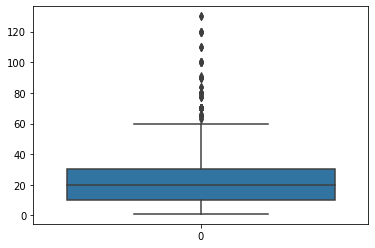

In [15]:
sns.boxplot(data=df['Quantity'])

In [16]:
df['UnitPrice'] = df['UnitPrice'].astype(str).astype(float)

In [17]:
df['Freight'] = df['Freight'].astype(str).astype(float)

<AxesSubplot:>

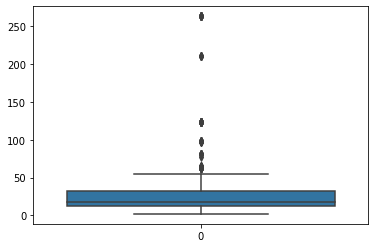

In [18]:
sns.boxplot(data=df['UnitPrice'])

<AxesSubplot:>

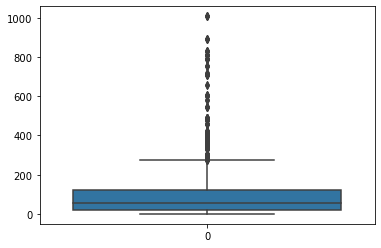

In [19]:
sns.boxplot(data=df['Freight'])

<AxesSubplot:>

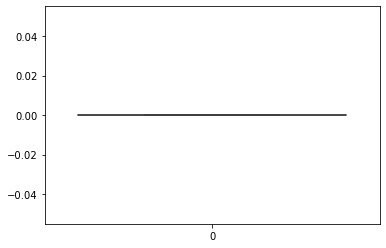

In [20]:
sns.boxplot(data=df['Discount'])

3. Lakukan penanganan pada anomaly tersebut. (Missing value, outliers, dll)

In [21]:
df.drop('ShipRegion', axis=1, inplace=True)
df.drop('CustomerID', axis=1, inplace=True)
df.drop('EmployeeID', axis=1, inplace=True)
df.drop('Discount', axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         2155 non-null   int64         
 1   OrderDate       2155 non-null   datetime64[ns]
 2   RequiredDate    2155 non-null   datetime64[ns]
 3   ShippedDate     2082 non-null   datetime64[ns]
 4   ShipVia         2155 non-null   int64         
 5   Freight         2155 non-null   float64       
 6   ShipName        2155 non-null   object        
 7   ShipAddress     2155 non-null   object        
 8   ShipCity        2155 non-null   object        
 9   ShipPostalCode  2100 non-null   object        
 10  ShipCountry     2155 non-null   object        
 11  ProductID       2155 non-null   int64         
 12  UnitPrice       2155 non-null   float64       
 13  Quantity        2155 non-null   int64         
dtypes: datetime64[ns](3), float64(2), int64(4), object(5)
me

# DATA VISUALIZATION

1. Tampilkan banyaknya order dari negara yang melakukan pengiriman

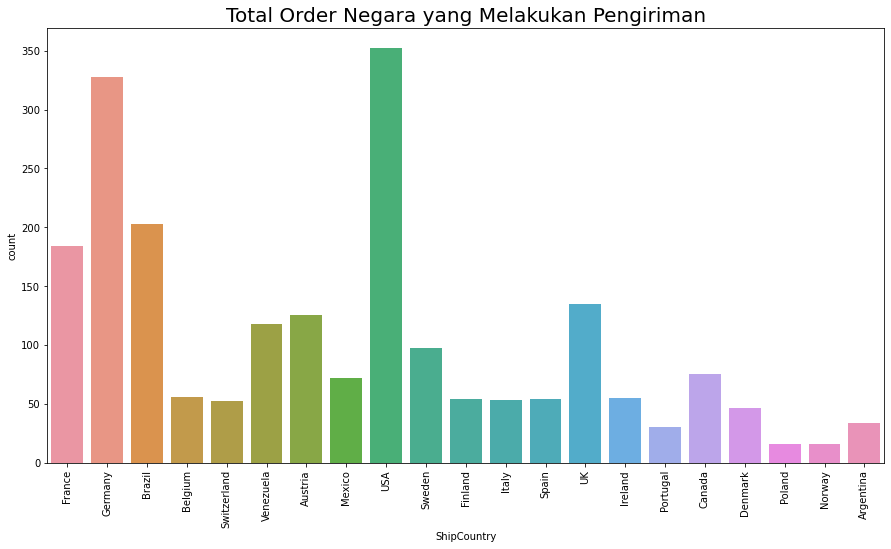

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='ShipCountry')
plt.xticks(rotation=90)
plt.title("Total Order Negara yang Melakukan Pengiriman", size=20)
plt.show()

2. Tampilkan grafik order tahunan dari 4 negara yang berbeda (negara mana yang paling stabil melakukan order di tiap tahun nya ?)

In [24]:
df['year'] = pd.DatetimeIndex(df['OrderDate']).year
df['year'].head()

0    1996
1    1996
2    1996
3    1996
4    1996
Name: year, dtype: int64

In [25]:
year_country = df.groupby(['year','ShipCountry'])['OrderID'].count().reset_index()
year_country.head()

,year,ShipCountry,OrderID
0,1996,Austria,27
1,1996,Belgium,6
2,1996,Brazil,36
3,1996,Canada,11
4,1996,Denmark,10


In [26]:
year_country[year_country['year'] == 1996].sort_values(by ='OrderID', ascending=False).head(4)

,year,ShipCountry,OrderID
7,1996,Germany,70
18,1996,USA,59
2,1996,Brazil,36
6,1996,France,35


In [27]:
year_country[year_country['year'] == 1997].sort_values(by ='OrderID', ascending=False).head(4)

,year,ShipCountry,OrderID
39,1997,USA,170
28,1997,Germany,170
23,1997,Brazil,106
27,1997,France,93


In [28]:
year_country[year_country['year'] == 1998].sort_values(by ='OrderID', ascending=False).head(4)

,year,ShipCountry,OrderID
60,1998,USA,123
49,1998,Germany,88
44,1998,Brazil,61
48,1998,France,56


In [29]:
top5_order_by_year = year_country[year_country['ShipCountry'].isin(['USA', 'Germany', 'Brazil', 'France'])]

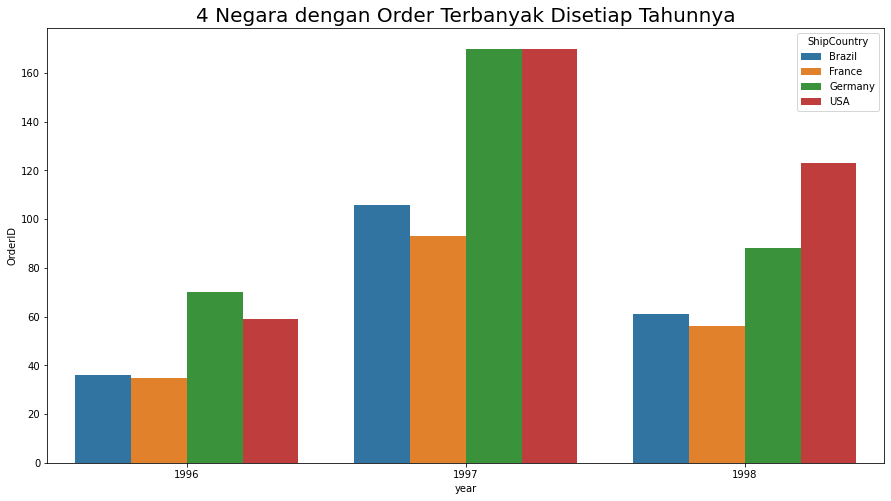

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(data=top5_order_by_year, x='year', y='OrderID', hue='ShipCountry')
plt.title('4 Negara dengan Order Terbanyak Disetiap Tahunnya', size=20)
plt.show()

3. Tampilkan 4 negara dengan total kargo terberat setiap tahunnya

In [31]:
year_freight = df.groupby(['year', 'ShipCountry'])['Freight'].sum().reset_index()
year_freight

,year,ShipCountry,Freight
0,1996,Austria,3885.98
1,1996,Belgium,172.71
2,1996,Brazil,4581.78
3,1996,Canada,415.57
4,1996,Denmark,217.20
...,...,...,...
57,1998,Sweden,3558.37
58,1998,Switzerland,581.49
59,1998,UK,3573.07
60,1998,USA,19115.35


In [32]:
year_freight[year_freight['year'] == 1996].sort_values(by ='Freight', ascending=False).head(4)

,year,ShipCountry,Freight
18,1996,USA,6275.51
7,1996,Germany,5934.41
2,1996,Brazil,4581.78
0,1996,Austria,3885.98


In [33]:
year_freight[year_freight['year'] == 1997].sort_values(by ='Freight', ascending=False).head(4)

,year,ShipCountry,Freight
28,1997,Germany,22008.59
39,1997,USA,20774.96
21,1997,Austria,14401.87
27,1997,France,7405.97


In [34]:
year_freight[year_freight['year'] == 1998].sort_values(by ='Freight', ascending=False).head(4)

,year,ShipCountry,Freight
60,1998,USA,19115.35
49,1998,Germany,10227.75
42,1998,Austria,9443.59
44,1998,Brazil,3621.26


In [35]:
top5_freight_by_year = year_freight[year_freight['ShipCountry'].isin(['USA', 'Germany', 'Brazil', 'Austria'])]

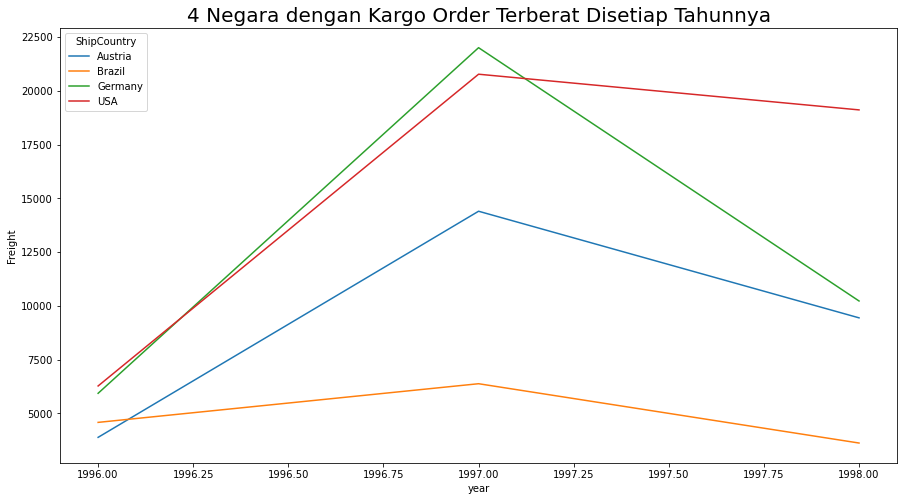

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(data=top5_freight_by_year, x='year', y='Freight', hue='ShipCountry')
plt.title('4 Negara dengan Kargo Order Terberat Disetiap Tahunnya', size=20)
plt.show()

4. Tampilkan banyaknya jumlah quantity order dari semua pengiriman tiap negara

In [37]:
country_qty = df.groupby(['ShipCountry'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
country_qty

,ShipCountry,Quantity
19,USA,9330
8,Germany,9213
1,Austria,5167
3,Brazil,4247
7,France,3254
20,Venezuela,2936
18,UK,2742
16,Sweden,2235
4,Canada,1984
9,Ireland,1684


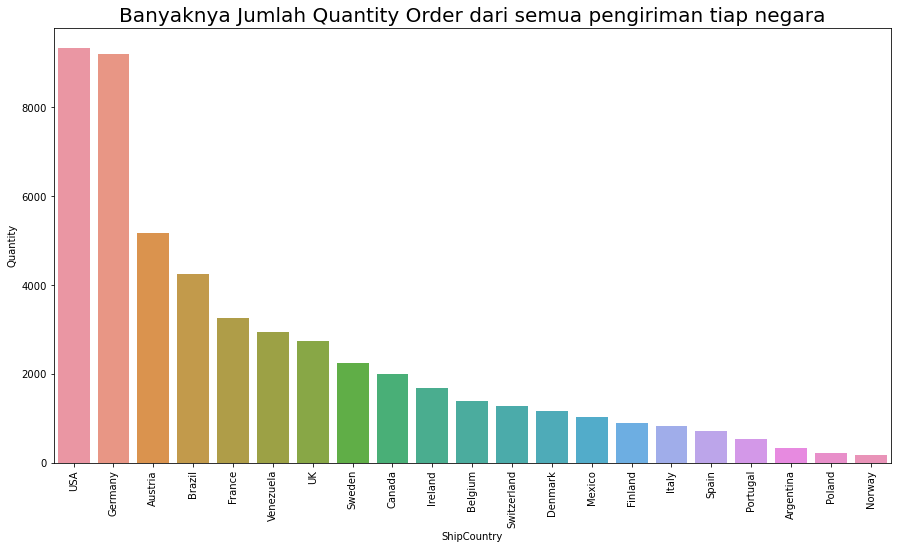

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(
    data=country_qty,
    x='ShipCountry',
    y='Quantity')
plt.xticks(rotation=90)
plt.title("Banyaknya Jumlah Quantity Order dari semua pengiriman tiap negara", size=20)
plt.show()

5. Tampilkan persentase penggunaan jasa shipping berdasarkan total order

In [39]:
pieee = df.groupby(['ShipVia'])['OrderID'].count().reset_index()
pieee

,ShipVia,OrderID
0,1,646
1,2,864
2,3,645


In [40]:
companyName= sql_df('SELECT * FROM Shippers')
companyName

,ShipperID,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [41]:
shipName = pd.merge(pieee, companyName, left_on='ShipVia', right_on='ShipperID')
shipName.drop('ShipperID', axis=1, inplace=True)
shipName

,ShipVia,OrderID,CompanyName,Phone
0,1,646,Speedy Express,(503) 555-9831
1,2,864,United Package,(503) 555-3199
2,3,645,Federal Shipping,(503) 555-9931


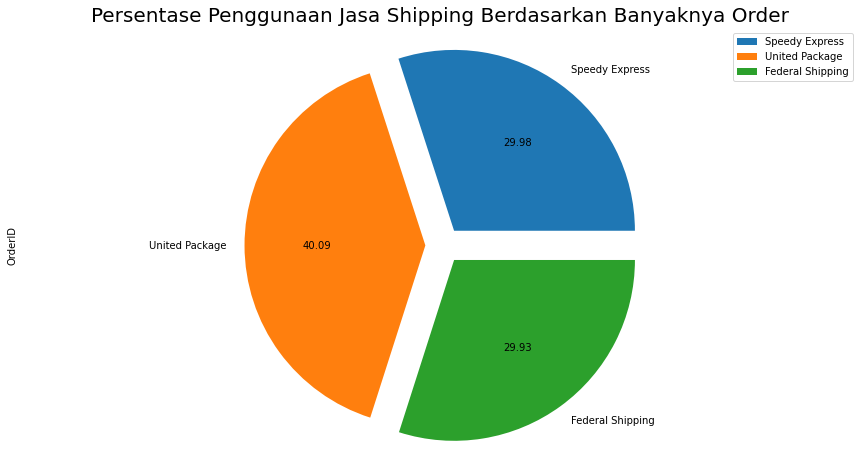

In [42]:
shipName.plot.pie(y='OrderID',figsize=(15,8),labels=shipName['CompanyName'],autopct ='%.2f', 
              explode=(0.1,0.1,0.1))
plt.axis('equal')
plt.title('Persentase Penggunaan Jasa Shipping Berdasarkan Banyaknya Order', size=20)
plt.show()

6. Tampilkan korelasi antara Freight, Quantity, dan UnitPrice alam bentuk heatmap 

In [43]:
df[['Freight', 'Quantity', 'UnitPrice']].corr(method='spearman')

,Freight,Quantity,UnitPrice
Freight,1.00000,0.407870,0.219290
Quantity,0.40787,1.000000,0.013606
UnitPrice,0.21929,0.013606,1.000000


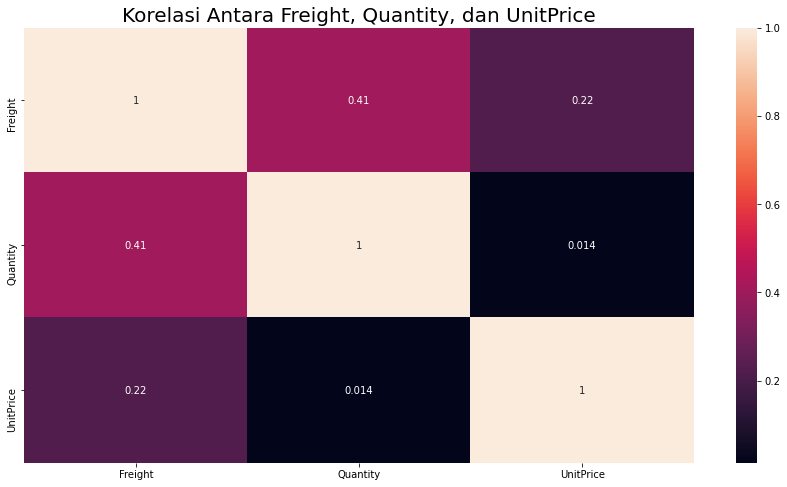

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(df[['Freight', 'Quantity', 'UnitPrice']].corr(method='spearman'), annot=True)
plt.title("Korelasi Antara Freight, Quantity, dan UnitPrice", size=20)
plt.show()

# STATISTICS

1. Lakukan uji statistic hipotesis testing terhadap Total UnitPrice dan 'ShipVia' menggunakan nama perusahaan

In [45]:
from scipy.stats import f_oneway

df = pd.merge(df, companyName, left_on='ShipVia', right_on='ShipperID', how='left')
df.head()

,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipPostalCode,ShipCountry,ProductID,UnitPrice,Quantity,year,ShipperID,CompanyName,Phone
0,10248,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,51100,France,11,14.0,12,1996,3,Federal Shipping,(503) 555-9931
1,10248,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,51100,France,42,9.8,10,1996,3,Federal Shipping,(503) 555-9931
2,10248,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,51100,France,72,34.8,5,1996,3,Federal Shipping,(503) 555-9931
3,10249,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitten,Luisenstr. 48,Mnster,44087,Germany,14,18.6,9,1996,1,Speedy Express,(503) 555-9831
4,10249,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitten,Luisenstr. 48,Mnster,44087,Germany,51,42.4,40,1996,1,Speedy Express,(503) 555-9831


In [53]:
print ('Hipotesis')
print ('H0 \t: Data Berdistribusi Normal')
print ('H1 \t: Data Tidak Berdistribusi Normal')

stat, pval = f_oneway(df[df['CompanyName'] == 'Speedy Express']['UnitPrice'],
        df[df['CompanyName'] == 'United Package']['UnitPrice'],
        df[df['CompanyName'] == 'Federal Shipping']['UnitPrice'])

if pval < 0.05 :
    print ('Tolak H0')
else :
    print ('Gagal Tolak H0')

Hipotesis
H0 	: Data Berdistribusi Normal
H1 	: Data Tidak Berdistribusi Normal
Gagal Tolak H0


2. Apakah jumlah Quantity order pada tahun 1997 lebih sedikit dibandingkan dengan tahun 1998? Lakukan uji hipotesis untuk membuktikan hal tersebut

C:\Users\Moses\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


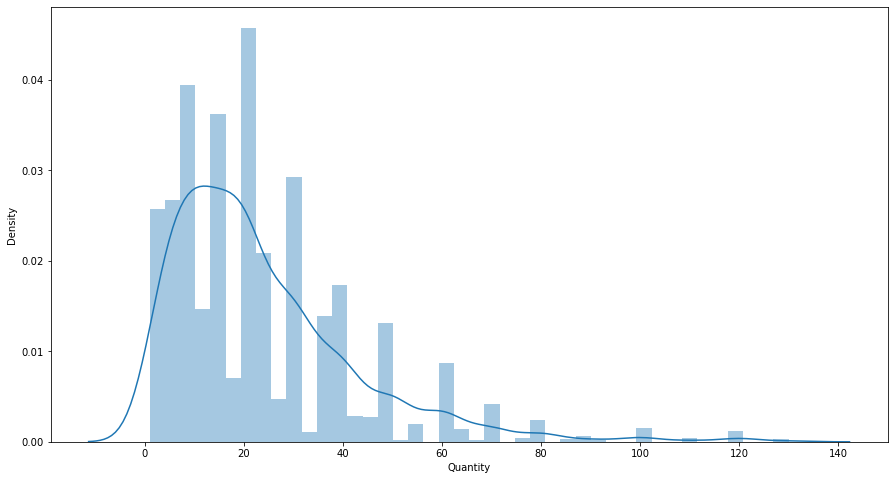

In [46]:
# Uji Normalitas Dengan Grafik
plt.figure(figsize = (15,8))
sns.distplot(df['Quantity'])
plt.show()

In [47]:
# Uji Normalitas dengan Shapiro Wilk
from scipy.stats import shapiro
print ('Hipotesis')
print ('H0 \t: Data Berdistribusi Normal')
print ('H1 \t: Data Tidak Berdistribusi Normal')

stat, pvalshapiro = shapiro(df['Quantity'])

if pvalshapiro < 0.05 :
    print ('Tolak H0')
else :
    print ('Gagal Tolak H0')

Hipotesis
H0 	: Data Berdistribusi Normal
H1 	: Data Tidak Berdistribusi Normal
Tolak H0


In [57]:
# Uji Perbandingan Nilai
from scipy.stats import mannwhitneyu

print ('Hipotesis')
print ('H0 \t: Jumlah Quantity Order Ditahun 1997 Lebih Besar atau Sama Dengan Di 1998')
print ('H1 \t: Jumlah Quantity Order Ditahun 1997 Lebih Sedikit Dibanding Tahun 1998')

stat, pvalMannWhit = mannwhitneyu(
    df[df['year'] == 1997]['Quantity'],
    df[df['year'] == 1998]['Quantity'],
    alternative = 'less'
)

if pvalMannWhit < 0.05 :
    print ('Tolak H0')
else :
    print ('Gagal Tolak H0')

Hipotesis
H0 	: Jumlah Quantity Order Ditahun 1997 Lebih Besar atau Sama Dengan Di 1998
H1 	: Jumlah Quantity Order Ditahun 1997 Lebih Sedikit Dibanding Tahun 1998
Gagal Tolak H0


3. Apakah terdapat perbedaan total Freight dari tahun ketahun? Lakukan uji hipotesis untuk membuktikan hal tersebut

In [49]:
# Uji Normalitas dengan Shapiro Wilk
from scipy.stats import shapiro
print ('Hipotesis')
print ('H0 \t: Data Berdistribusi Normal')
print ('H1 \t: Data Tidak Berdistribusi Normal')

stat, pvalshapiro1 = shapiro(df['Freight'])

if pvalshapiro1 < 0.05 :
    print (f'Nilai P-Value = {pvalshapiro1}, Tolak H0')
else :
    print (f'Nilai P-Value = {pvalshapiro1}, Gagal Tolak H0')

Hipotesis
H0 	: Data Berdistribusi Normal
H1 	: Data Tidak Berdistribusi Normal
Nilai P-Value = 0.0, Tolak H0


In [50]:
# Uji Perbandingan Nilai
from scipy.stats import kruskal

print ('Hipotesis')
print ('H0 \t: Tidak Terdapat Perbedaan Total Freight Setiap Tahunnya')
print ('H1 \t: Terdapat Perbedaan Upah Total Freight Setiap Tahunnya')

stat, pvalkruskal = kruskal(
    df[df['year'] == 1996]['Freight'],
    df[df['year'] == 1997]['Freight'],
    df[df['year'] == 1998]['Freight']
)

if pvalkruskal < 0.05 :
    print ('Tolak H0')
else :
    print ('Gagal Tolak H0')

Hipotesis
H0 	: Tidak Terdapat Perbedaan Total Freight Setiap Tahunnya
H1 	: Terdapat Perbedaan Upah Total Freight Setiap Tahunnya
Gagal Tolak H0
